## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# First mount your drive before running these cells. 
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/BDA|CSE-545/BigData

/content/drive/.shortcut-targets-by-id/16jGJ9GyfPKb0e-klZzKKwvFurqrpolRn/BigData


In [4]:
%ls

'backup-CSE545 Proposal Presentation.gslides'
'Blueprint .gdoc'
 Codes/
'CSE545 Proposal Presentation.gslides'
 Datasets/
'Final Project Layout.gdoc'
 FinalReport.gdoc
 Images/
 links.csv
 Manual.pdf
 MLPart/
 mockGraphs/
'New Fields with less empty values.gsheet'


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import permutation_test_score as perm_test
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median', add_indicator=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier

In [5]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
le = preprocessing.LabelEncoder()


In [6]:
# !unzip test_incomes.zip

In [29]:
df_country = pd.read_csv("Datasets/dfCountryImputed2.csv")

In [30]:
df_country.columns

Index(['Country Name', ' "Country Code"', ' "Year"',
       ' "Forest area (% of land area)"',
       ' "Urban population (% of total population)"',
       ' "Urban population growth (annual %)"',
       ' "Access to electricity urban (% of urban population)"',
       ' "Renewable energy consumption (% of total final energy consumption)"',
       ' "Individuals using the Internet (% of population)"',
       ' "Adjusted savings: carbon dioxide damage (% of GNI)"',
       ' "Adjusted savings: energy depletion (% of GNI)"',
       ' "Adjusted savings: mineral depletion (% of GNI)"',
       ' "Merchandise trade (% of GDP)"',
       ' "Adjusted savings: natural resources depletion (% of GNI)"',
       ' "Exports of goods and services (% of GDP)"',
       ' "Imports of goods and services (% of GDP)"', ' "Trade (% of GDP)"',
       ' "Forest rents (% of GDP)"', ' "Mineral rents (% of GDP)"',
       ' "GDP (current US$)"',
       ' "GDP per capita PPP (current international $)"',
       ' "GNI

In [33]:
df_country

,Country Name,"""Country Code""","""Year""","""Forest area (% of land area)""","""Urban population (% of total population)""","""Urban population growth (annual %)""","""Access to electricity urban (% of urban population)""","""Renewable energy consumption (% of total final energy consumption)""","""Individuals using the Internet (% of population)""","""Adjusted savings: carbon dioxide damage (% of GNI)""",...,"""PM2.5 air pollution population exposed to levels exceeding WHO guideline value (% of total)""","""Research and development expenditure (% of GDP)""","""Researchers in R&D (per million people)""","""Automated teller machines (ATMs) (per 100000 adults)""","""Hospital beds (per 1000 people)""","""Physicians (per 1000 people)""","""High-technology exports (current US$)""","""New business density (new registrations per 1000 people ages 15-64)""","""Exports as a capacity to import (constant LCU)""","""International tourism number of departures"""
0,Caribbean small states,CSS,2000,90.833074,50.247997,0.972862,94.591355,10.589892,4.919306,2.436088,...,100.000000,0.280329,127.938603,31.835906,1.968216,0.822133,8.516251e+08,1.742234,2.648003e+14,1.675714e+06
1,Heavily indebted poor countries (HIPC),HPC,2000,29.517117,28.725522,3.858673,55.856795,85.578681,0.174023,0.887722,...,99.999290,0.239460,41.732127,4.576951,0.623345,0.113461,7.750951e+07,0.606356,5.425633e+12,1.088599e+06
2,Least developed countries: UN classification,LDC,2000,29.557784,25.024086,3.905317,56.472944,83.824651,0.099690,0.959840,...,100.000000,0.359538,73.228898,4.702958,0.587564,0.137848,6.079364e+08,0.580215,5.719990e+12,3.355626e+06
3,Other small states,OSS,2000,30.630509,49.820968,2.921326,80.467722,31.469183,5.395988,2.268950,...,90.952061,0.172409,136.977048,18.759287,1.205378,0.784771,1.006878e+09,2.128905,1.643360e+13,1.142916e+06
4,Pacific island small states,PSS,2000,66.692368,34.543925,1.825599,87.144392,44.655081,1.458231,0.932779,...,100.000000,0.112546,92.960700,19.937545,1.448428,0.367448,3.561132e+07,0.773226,2.433815e+13,6.496961e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,Vietnam,VNM,2020,47.225110,37.340000,2.829734,96.116546,16.845443,70.290000,2.234300,...,100.000000,0.556956,550.387348,26.264738,2.868094,0.811357,1.015344e+11,1.661228,5.462294e+15,5.170565e+06
4623,West Bank and Gaza,PSE,2020,1.684385,76.719000,2.850877,100.000000,8.094333,17.721181,1.857374,...,NaN,0.475846,575.023763,23.744545,2.506523,1.403315,1.199294e+07,4.041225,2.224570e+09,3.437256e+06
4624,Yemen Rep.,YEM,2020,1.039832,37.908000,3.940860,73.840044,5.772373,8.788783,2.054260,...,NaN,0.364917,430.304901,39.840322,2.010673,1.050491,1.308910e+09,2.569113,5.025915e+12,1.911263e+06
4625,Zambia,ZMB,2020,60.283337,44.629000,4.141609,54.326778,9.359068,29.356320,1.154633,...,NaN,0.599900,502.944500,10.027382,3.444033,1.109540,1.069741e+07,1.074762,5.291578e+12,4.184249e+06


In [13]:
df_country['Country Name']= df_country['Country Name'].str.replace(",", " ")

In [15]:
df_country[df_country['Country Code'] == 'HKG']

,Country Name,Country Code,Year,Forest area (% of land area),Urban population (% of total population),Urban population growth (annual %),"Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Individuals using the Internet (% of population),Adjusted savings: carbon dioxide damage (% of GNI),...,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Research and development expenditure (% of GDP),Researchers in R&D (per million people),"Automated teller machines (ATMs) (per 100,000 adults)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)",High-technology exports (current US$),"New business density (new registrations per 1,000 people ages 15-64)",Exports as a capacity to import (constant LCU),"International tourism, number of departures"
92,Hong Kong SAR China,HKG,2000,NaN,100.0,0.881594,100.0,0.0958,27.827761,0.433877,...,NaN,0.46493,1169.78769,NaN,NaN,NaN,NaN,NaN,2.101483e+12,58901000.0
312,Hong Kong SAR China,HKG,2001,NaN,100.0,0.736963,100.0,0.1042,38.671403,0.424898,...,NaN,0.53645,1372.74013,NaN,NaN,NaN,NaN,NaN,2.087609e+12,61096000.0
532,Hong Kong SAR China,HKG,2002,NaN,100.0,0.442847,100.0,0.1419,43.082383,0.477052,...,NaN,0.58147,1587.48988,NaN,NaN,NaN,NaN,NaN,2.292349e+12,64540000.0
752,Hong Kong SAR China,HKG,2003,NaN,100.0,-0.197404,100.0,0.1462,52.200043,0.549745,...,NaN,0.68027,2007.08525,NaN,NaN,NaN,NaN,NaN,2.557203e+12,60936000.0
972,Hong Kong SAR China,HKG,2004,NaN,100.0,0.779919,100.0,0.1545,56.399880,0.532226,...,NaN,0.72176,2163.66776,39.803633,NaN,NaN,NaN,NaN,2.901325e+12,68903000.0
1193,Hong Kong SAR China,HKG,2005,NaN,100.0,0.436871,100.0,0.1399,56.900000,0.558449,...,NaN,0.77343,2662.50136,41.126616,NaN,NaN,NaN,NaN,3.229155e+12,72300000.0
1414,Hong Kong SAR China,HKG,2006,NaN,100.0,0.642270,100.0,0.1297,60.800000,0.519609,...,NaN,0.79468,2694.02889,42.265098,NaN,NaN,NaN,16.185291,3.514885e+12,75812000.0
1635,Hong Kong SAR China,HKG,2007,NaN,100.0,0.859633,100.0,0.1190,64.800000,0.514551,...,NaN,0.75161,2858.61946,41.647759,NaN,NaN,2.650435e+09,19.605874,3.823769e+12,80682000.0
1855,Hong Kong SAR China,HKG,2008,NaN,100.0,0.598239,100.0,0.1773,66.700000,0.496015,...,NaN,0.71996,2680.96008,42.822553,NaN,NaN,2.354314e+09,18.976436,3.930436e+12,81911000.0
2075,Hong Kong SAR China,HKG,2009,NaN,100.0,0.215353,100.0,0.1407,69.400000,0.522604,...,NaN,0.77342,2784.69270,44.156775,NaN,NaN,1.999988e+09,20.922963,3.587293e+12,81958000.0


In [ ]:
# df['position'] = le.fit(df['position']).transform(df['position'])

In [ ]:
# df.drop(['word_data.N_participant_responses'],axis=1, inplace =True)

In [9]:
df_tt = df_country[['Country Code','Forest area (% of land area)']]

In [10]:
# df_tt.groupby(['Country Code'])['Forest area (% of land area)']

df_for_gp = df_country.groupby(['Country Code'], as_index=True)['Forest area (% of land area)'].agg({
  'sum', 'count','mean'}).reset_index()

In [15]:
df_for_gp[df_for_gp['count']<21]

,Country Code,mean,sum,count
11,ASM,87.082500,1741.650000,20
38,CHI,4.527778,36.222222,8
51,CUW,0.157658,1.891892,12
78,FRO,0.057307,1.146132,20
84,GIB,0.000000,0.000000,19
91,GRL,0.000536,0.010720,20
96,HKG,NaN,0.000000,0
108,IMN,6.070175,115.333333,19
136,LIE,41.873125,837.462500,20
145,MAC,NaN,0.000000,0


In [ ]:
df_country.replace("..", np.nan, inplace=True)
df_country.replace("...", np.nan, inplace=True)

In [ ]:
df_country = df_country.dropna(axis=0, thresh=20)


In [ ]:
df_country.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
from sklearn.manifold import MDS


In [ ]:
mds_pc = MDS(n_components=2, dissimilarity='precomputed')


In [ ]:
df_dropped = df_country.drop(['Country Name', 'Country Code'], axis=1 )
mds_fitted_pc = mds_pc.fit(1- np.abs(df_country.drop(['Country Name', 'Country Code'], axis=1).corr()))


In [ ]:
mds_fitted_pc

MDS(dissimilarity='precomputed')

In [ ]:
df_mds_corr = pd.DataFrame.from_records(mds_fitted_pc.embedding_, columns=['x','y'])


In [ ]:
df_mds_corr['fields'] = df_dropped.columns


In [9]:
df_country.isna().sum()

Country Name                                                                0
Country Code                                                                0
Access to clean fuels and technologies for cooking (% of population)    11738
Access to electricity (% of population)                                  9737
Access to electricity, rural (% of rural population)                    10075
                                                                        ...  
Women who were first married by age 15 (% of women ages 20-24)          16054
Women who were first married by age 18 (% of women ages 20-24)          15964
Women's share of population ages 15+ living with HIV (%)                11672
Young people (ages 15-24) newly infected with HIV                       12485
Year                                                                        0
Length: 1446, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaled_features = scaler.fit_transform()
df_country = pd.DataFrame(scaled_features, index=df_country.index, columns=df_country.columns)

In [ ]:
df_dropped = df_country.drop(['Country Name', 'Country Code'], axis=1 )

In [ ]:
df_corr = 1-np.abs(df_country.corr())


In [16]:
df_country.to_csv('Datasets/dfCorrected14May.csv', index=False)

In [ ]:
df_country.pivot_table(values='2007 [YR2007]', index=df.index, columns='Series Name', aggfunc='first')

In [ ]:
df_country.reset_index().groupby(['id', 'key'])['val'].aggregate('first').unstack()

In [ ]:
df_country_updated= [[]]

In [ ]:
df_country_updated = pd.DataFrame(df_country['Country Name'].unique(), columns=['Country Name'])

In [ ]:
df_country_updated['Country Code'] = pd.DataFrame(df_country['Country Code'].unique())

In [ ]:
df_country_updated


,Country Name,Country Code
0,Africa Eastern and Southern,AFE
1,Africa Western and Central,AFW
2,Arab World,ARB
3,Caribbean small states,CSS
4,Central Europe and the Baltics,CEB
...,...,...
261,Virgin Islands (U.S.),VIR
262,West Bank and Gaza,PSE
263,"Yemen, Rep.",YEM
264,Zambia,ZMB


In [ ]:
#find unique series name
arrFeatures = df_country['Indicator Name'].unique()

In [ ]:
arrFeatures[0]

'Access to clean fuels and technologies for cooking (% of population)'

In [ ]:
for ftr in arrFeatures:
  newdf2007 = df_country[df_country['Series Name'] == ftr][['Country Code', '2007 [YR2007]']]
  df_country_updated[ftr] = newdf2007[['2007 [YR2007]']].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
dfAggAllCountryNew

,Country Name,Country Code,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),...,Urban population (% of total population),Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women Business and the Law Index Score (scale 1-100),Year
5587,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,2.779593e+11,1.783099e+11,NaN,1773.112235,...,25.139125,5.386404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981
5588,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,2.368645e+11,NaN,NaN,...,45.406731,4.499333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981
5589,Caribbean small states,CSS,NaN,NaN,NaN,NaN,NaN,1.174464e+10,NaN,NaN,...,46.732366,1.902381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981
5591,Early-demographic dividend,EAR,NaN,NaN,NaN,6.057544,2.424527e+12,1.155816e+12,3.453398,1430.518589,...,31.120498,4.177018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981
5592,East Asia & Pacific,EAS,NaN,NaN,NaN,NaN,NaN,1.626423e+12,NaN,NaN,...,28.397249,3.950829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,Vanuatu,VUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.525000,2.909258,NaN,NaN,NaN,NaN,NaN,NaN,58.125,2020
16220,Vietnam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.340000,2.829734,NaN,NaN,NaN,NaN,NaN,NaN,81.875,2020
16222,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.719000,2.850877,NaN,NaN,NaN,NaN,NaN,NaN,26.250,2020
16224,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.629000,4.141609,NaN,NaN,NaN,NaN,NaN,NaN,81.250,2020


In [23]:
dfAggAllCountryNew= df_country[(df_country['Year']>1980) & (df_country['Year'] <2021)]

In [25]:
dfAggAllCountryNew = dfAggAllCountryNew.dropna(axis=0, thresh=300)

In [27]:
dfAggAllCountryNew = dfAggAllCountryNew.dropna(axis=1, thresh=5000)

In [29]:
dfAggAllCountryNew = dfAggAllCountryNew.dropna(axis=0, thresh=300)

In [31]:
dfAggAllCountryNew.isna().sum()

Country Name                                                                            0
Country Code                                                                            0
Access to electricity (% of population)                                              2815
Access to electricity, rural (% of rural population)                                 3079
Access to electricity, urban (% of urban population)                                 2847
                                                                                     ... 
Wage and salaried workers, female (% of female employment) (modeled ILO estimate)    2235
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)        2235
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)      2235
Women Business and the Law Index Score (scale 1-100)                                 1988
Year                                                                                    0
Length: 63

In [74]:
dfAggAllCountryFiltr1= dfAggAllCountryNew[(dfAggAllCountryNew['Year']>=2000)]

In [60]:
for ele in dfAggAllCountryFiltr1.columns:
  print(ele)

Country Name
Country Code
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Adjusted net national income (annual % growth)
Adjusted net national income (constant 2015 US$)
Adjusted net national income (current US$)
Adjusted net national income per capita (annual % growth)
Adjusted net national income per capita (constant 2015 US$)
Adjusted net national income per capita (current US$)
Adjusted net savings, excluding particulate emission damage (% of GNI)
Adjusted net savings, including particulate emission damage (% of GNI)
Adjusted savings: carbon dioxide damage (% of GNI)
Adjusted savings: carbon dioxide damage (current US$)
Adjusted savings: consumption of fixed capital (% of GNI)
Adjusted savings: consumption of fixed capital (current US$)
Adjusted savings: education expenditure (% of GNI)
Adjusted savings: education expenditure (current US$)
Adjusted savings: energy depletion (% of GNI)


In [75]:
dfAggAllCountryFiltr1

,Country Name,Country Code,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),...,Urban population (% of total population),Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women Business and the Law Index Score (scale 1-100),Year
10640,Africa Eastern and Southern,AFE,20.086007,8.491610,56.083452,NaN,3.433502e+11,2.207482e+11,NaN,843.663820,...,28.669286,3.641651,82.804635,67.928640,74.832553,15.672296,29.135483,22.889395,NaN,2000
10641,Africa Western and Central,AFW,34.658011,16.565421,73.405761,4.653521,2.571181e+11,9.891059e+10,1.799369,982.604483,...,35.352981,4.087957,91.844040,81.882280,86.440300,7.470665,16.726201,12.494992,NaN,2000
10642,Arab World,ARB,78.872476,61.458382,NaN,NaN,NaN,5.699852e+11,NaN,NaN,...,52.989302,2.634076,46.033015,29.942538,33.070639,51.974793,61.661003,59.762448,NaN,2000
10643,Caribbean small states,CSS,86.747920,78.780193,94.591355,NaN,NaN,2.827104e+10,NaN,NaN,...,50.247997,0.972862,24.416257,28.873585,27.142700,73.268990,66.227573,68.960317,NaN,2000
10644,Central Europe and the Baltics,CEB,100.000000,100.000000,100.000000,3.323507,6.176697e+11,3.442822e+11,3.908327,5689.138894,...,61.476187,-0.608882,23.343374,24.068882,23.735360,74.755210,71.772737,73.135951,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,Vanuatu,VUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.525000,2.909258,NaN,NaN,NaN,NaN,NaN,NaN,58.125,2020
16220,Vietnam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.340000,2.829734,NaN,NaN,NaN,NaN,NaN,NaN,81.875,2020
16222,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.719000,2.850877,NaN,NaN,NaN,NaN,NaN,NaN,26.250,2020
16224,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.629000,4.141609,NaN,NaN,NaN,NaN,NaN,NaN,81.250,2020


In [76]:
dfAggAllCountryFiltr1.isna().sum()

Country Name                                                                            0
Country Code                                                                            0
Access to electricity (% of population)                                               250
Access to electricity, rural (% of rural population)                                  418
Access to electricity, urban (% of urban population)                                  290
                                                                                     ... 
Wage and salaried workers, female (% of female employment) (modeled ILO estimate)     341
Wage and salaried workers, male (% of male employment) (modeled ILO estimate)         341
Wage and salaried workers, total (% of total employment) (modeled ILO estimate)       341
Women Business and the Law Index Score (scale 1-100)                                 1082
Year                                                                                    0
Length: 63

In [57]:
dfAggAllCountryFiltr1 = dfAggAllCountryFiltr1.dropna(axis=1, thresh=3000)

In [ ]:
selectedFtrs = ['Country Name', 'Country Code', 'Year',  'Urban land area (sq. km)', 
 'Market capitalization of listed domestic companies (% of GDP)', 'Listed domestic companies, total',
 'Net bilateral aid flows from DAC donors, Total (current US$)', 'Net ODA provided to the least developed countries (% of GNI)', 
 'Net ODA provided, total (% of GNI)', 'Access to electricity, urban (% of urban population)', 
 'Renewable energy consumption (% of total final energy consumption)', 'CO2 emissions (kg per PPP $ of GDP)', 
  'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 
 'Disaster risk reduction progress score (1-5 scale; 5=best)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 
 'Plant species (higher), threatened', 'Population living in slums (% of urban population)', 'Research and development expenditure (% of GDP)', 
 'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)', 'Automated teller machines (ATMs) (per 100,000 adults)', 
 'Ease of doing business rank (1=most business-friendly regulations)', 'New business density (new registrations per 1,000 people ages 15-64)', 
 'Investment in energy with private participation (current US$)', 'Investment in transport with private participation (current US$)', 'Fixed broadband subscriptions', 
 'Air transport, registered carrier departures worldwide', 'Individuals using the Internet (% of population)', 
 'Adjusted savings: energy depletion (% of GNI)', 'Exports of goods and services (% of GDP)', 
 'Imports of goods and services (% of GDP)', 'Trade (% of GDP)',  'GDP (current US$)', 'GDP per capita, PPP (current international $)', 'GNI (current US$)', 
 'Literacy rate, adult total (% of people ages 15 and above)', 'Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)', 
   'Number of infant deaths', 'Hospital beds (per 1,000 people)', 'Current health expenditure (% of GDP)', 
 'Researchers in R&D (per million people)',  'Prevalence of undernourishment (% of population)', 
  'International tourism, number of arrivals', 'International tourism, number of departures', 'High-technology exports (current US$)']

In [ ]:
dfAggAllCountryNew = dfAggAllCountryNew[[*selectedFtrs]]

In [62]:
selectedFtrsOG = ["Forest area (% of land area)", "Trade in services (% of GDP)","Communications, computer, etc. (% of service imports, BoP)",
                  "Imports of goods and services (BoP, current US$)","Transport services (% of service imports, BoP)","Foreign direct investment, net outflows (BoP, current US$)","ICT service exports (BoP, current US$)",
                  "Exports of goods and services (BoP, current US$)","Exports of goods, services and primary income (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",
                  "S&P Global Equity Indices (annual % change)",
                  "Listed domestic companies, total","Net bilateral aid flows from DAC donors, United States (current US$)","Net bilateral aid flows from DAC donors, Japan (current US$)",
                  "Net bilateral aid flows from DAC donors, Germany (current US$)","Net bilateral aid flows from DAC donors, United Kingdom (current US$)","Net bilateral aid flows from DAC donors, Norway (current US$)",
                  "Net bilateral aid flows from DAC donors, Greece (current US$)","Net bilateral aid flows from DAC donors, Hungary (current US$)","Net bilateral aid flows from DAC donors, Ireland (current US$)",
                  "Net bilateral aid flows from DAC donors, Total (current US$)","Net ODA provided to the least developed countries (% of GNI)","Net ODA provided, total (% of GNI)","Energy intensity level of primary energy (MJ/$2011 PPP GDP)",
                  "Access to electricity, urban (% of urban population)","Electric power transmission and distribution losses (% of output)","Renewable energy consumption (% of total final energy consumption)",
                  "CO2 intensity (kg per kg of oil equivalent energy use)","CO2 emissions (kg per 2015 US$ of GDP)","CO2 emissions (metric tons per capita)","CO2 emissions (kg per PPP $ of GDP)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",
                  "PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Bird species, threatened","Disaster risk reduction progress score (1-5 scale; 5=best)",
                  "Droughts, floods, extreme temperatures (% of population, average 1990-2009)","CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)",
                  "Fish species, threatened","Plant species (higher), threatened","Mammal species, threatened","Population living in slums (% of urban population)","Population in largest city",
                  "Population in the largest city (% of urban population)","Research and development expenditure (% of GDP)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",
                  "Automated teller machines (ATMs) (per 100,000 adults)","Terrestrial and marine protected areas (% of total territorial area)","Inflation, consumer prices (annual %)",
                  "Central government debt, total (% of GDP)","Taxes on exports (current LCU)","Ease of doing business rank (1=most business-friendly regulations)","New business density (new registrations per 1,000 people ages 15-64)",
                  "Cost of business start-up procedures (% of GNI per capita)","Investment in energy with private participation (current US$)","Investment in ICT with private participation (current US$)",
                  "Investment in transport with private participation (current US$)","Fixed broadband subscriptions","Air transport, registered carrier departures worldwide","Rail lines (total route-km)",
                  "Individuals using the Internet (% of population)","Military expenditure (% of GDP)","Chemicals (% of value added in manufacturing)","Adjusted savings: carbon dioxide damage (% of GNI)",
                  "Adjusted savings: energy depletion (% of GNI)","Adjusted savings: mineral depletion (% of GNI)","Adjusted savings: consumption of fixed capital (% of GNI)",
                  "Adjusted savings: natural resources depletion (% of GNI)","Exports as a capacity to import (constant LCU)","Exports of goods and services (% of GDP)",
                  "Imports of goods and services (% of GDP)","Trade (% of GDP)","Forest rents (% of GDP)","Mineral rents (% of GDP)","GDP (current US$)","GDP per capita, PPP (current international $)","GNI (current US$)",
                  "Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","Compulsory education, duration (years)",
                  "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",
                  "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",
                  "Current education expenditure, total (% of total expenditure in public institutions)","Government expenditure per student, primary (% of GDP per capita)",
                  "Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among adolescents ages 10-14 years (per 1,000)",
                  "Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",
                  "Number of infant deaths","Cause of death, by injury (% of total)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)","Current health expenditure (% of GDP)",
                  "Income share held by second 20%","Income share held by third 20%","Income share held by fourth 20%","Income share held by highest 20%","Income share held by highest 10%",
                  "Researchers in R&D (per million people)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Prevalence of undernourishment (% of population)",
                  "Death rate, crude (per 1,000 people)","International tourism, number of arrivals","International tourism, number of departures","International tourism, receipts (current US$)",
                  "International tourism, expenditures (% of total imports)","Merchandise trade (% of GDP)","Import volume index (2000 = 100)","Import value index (2000 = 100)",
                  "High-technology exports (current US$)","Battle-related deaths (number of people)"]

In [64]:
ftrsOG2 = ["Forest area (% of land area)","Urban land area (sq. km)","Trade in services (% of GDP)","Communications, computer, etc. (% of service imports, BoP)","Imports of goods and services (BoP, current US$)","Transport services (% of service imports, BoP)","Foreign direct investment, net outflows (BoP, current US$)","ICT service exports (BoP, current US$)","Exports of goods and services (BoP, current US$)","Exports of goods, services and primary income (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)","Market capitalization of listed domestic companies (current US$)","Market capitalization of listed domestic companies (% of GDP)","S&P Global Equity Indices (annual % change)","Listed domestic companies, total","Net bilateral aid flows from DAC donors, United States (current US$)","Net bilateral aid flows from DAC donors, Japan (current US$)","Net bilateral aid flows from DAC donors, Germany (current US$)","Net bilateral aid flows from DAC donors, United Kingdom (current US$)","Net bilateral aid flows from DAC donors, Norway (current US$)","Net bilateral aid flows from DAC donors, Greece (current US$)","Net bilateral aid flows from DAC donors, Hungary (current US$)","Net bilateral aid flows from DAC donors, Ireland (current US$)","Net bilateral aid flows from DAC donors, Total (current US$)","Net ODA provided to the least developed countries (% of GNI)","Net ODA provided, total (% of GNI)","Energy intensity level of primary energy (MJ/$2011 PPP GDP)","Access to electricity, urban (% of urban population)","Electric power transmission and distribution losses (% of output)","Renewable energy consumption (% of total final energy consumption)","CO2 intensity (kg per kg of oil equivalent energy use)","CO2 emissions (kg per 2015 US$ of GDP)","CO2 emissions (metric tons per capita)","CO2 emissions (kg per PPP $ of GDP)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Bird species, threatened","Disaster risk reduction progress score (1-5 scale; 5=best)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)","CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)","Fish species, threatened","Plant species (higher), threatened","Mammal species, threatened","Population living in slums (% of urban population)","Population in largest city","Population in the largest city (% of urban population)","Research and development expenditure (% of GDP)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)","Automated teller machines (ATMs) (per 100,000 adults)","Terrestrial and marine protected areas (% of total territorial area)","Inflation, consumer prices (annual %)","Central government debt, total (% of GDP)","Taxes on exports (current LCU)","Ease of doing business rank (1=most business-friendly regulations)","New business density (new registrations per 1,000 people ages 15-64)","Cost of business start-up procedures (% of GNI per capita)","Investment in energy with private participation (current US$)","Investment in ICT with private participation (current US$)","Investment in transport with private participation (current US$)","Fixed broadband subscriptions","Air transport, registered carrier departures worldwide","Rail lines (total route-km)","Individuals using the Internet (% of population)","Military expenditure (% of GDP)","Chemicals (% of value added in manufacturing)","Adjusted savings: carbon dioxide damage (% of GNI)","Adjusted savings: energy depletion (% of GNI)","Adjusted savings: mineral depletion (% of GNI)","Adjusted savings: consumption of fixed capital (% of GNI)","Adjusted savings: natural resources depletion (% of GNI)","Exports as a capacity to import (constant LCU)","Exports of goods and services (% of GDP)","Imports of goods and services (% of GDP)","Trade (% of GDP)","Forest rents (% of GDP)","Mineral rents (% of GDP)","GDP (current US$)","GDP per capita, PPP (current international $)","GNI (current US$)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","Compulsory education, duration (years)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Current education expenditure, total (% of total expenditure in public institutions)","Government expenditure per student, primary (% of GDP per capita)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)","Number of infant deaths","Cause of death, by injury (% of total)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)","Current health expenditure (% of GDP)","Income share held by second 20%","Income share held by third 20%","Income share held by fourth 20%","Income share held by highest 20%","Income share held by highest 10%","Researchers in R&D (per million people)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Prevalence of undernourishment (% of population)","Death rate, crude (per 1,000 people)","International tourism, number of arrivals","International tourism, number of departures","International tourism, receipts (current US$)","International tourism, expenditures (% of total imports)","Merchandise trade (% of GDP)","Import volume index (2000 = 100)","Import value index (2000 = 100)","High-technology exports (current US$)","Battle-related deaths (number of people)"]

In [186]:
ftrsToChk= [           
"Country Name",
"Country Code",
"Year",
"Forest area (% of land area)",
"Urban population (% of total population)",
"Urban population growth (annual %)",
"Access to electricity, urban (% of urban population)",
"Renewable energy consumption (% of total final energy consumption)",
"Individuals using the Internet (% of population)",
"Adjusted savings: carbon dioxide damage (% of GNI)",
"Adjusted savings: energy depletion (% of GNI)",
"Adjusted savings: mineral depletion (% of GNI)",
"Merchandise trade (% of GDP)",
"Adjusted savings: natural resources depletion (% of GNI)",
"Exports of goods and services (% of GDP)",
"Imports of goods and services (% of GDP)",
"Trade (% of GDP)",
"Forest rents (% of GDP)",
"Mineral rents (% of GDP)",
"GDP (current US$)",
"GDP per capita, PPP (current international $)",
"GNI (current US$)",
"Compulsory education, duration (years)",
"Probability of dying among children ages 5-9 years (per 1,000)",
"Probability of dying among adolescents ages 10-14 years (per 1,000)",
"Probability of dying among adolescents ages 15-19 years (per 1,000)",
"Probability of dying among youth ages 20-24 years (per 1,000)",
"Number of infant deaths",
"International tourism, number of arrivals",
"Net bilateral aid flows from DAC donors, United States (current US$)",
"Net bilateral aid flows from DAC donors, Japan (current US$)",
"Net bilateral aid flows from DAC donors, Germany (current US$)",
"Net bilateral aid flows from DAC donors, United Kingdom (current US$)",
"Net bilateral aid flows from DAC donors, Norway (current US$)",
"Net bilateral aid flows from DAC donors, Total (current US$)",
"Current health expenditure (% of GDP)",
"Prevalence of undernourishment (% of population)",
"International tourism, expenditures (% of total imports)",
"Communications, computer, etc. (% of service imports, BoP)",
"Foreign direct investment, net outflows (BoP, current US$)",
"CO2 emissions (metric tons per capita)",
"Cost of business start-up procedures (% of GNI per capita)",
"Military expenditure (% of GDP)",
"Import value index (2000 = 100)",
"Market capitalization of listed domestic companies (% of GDP)",
"Listed domestic companies, total",
"Energy intensity level of primary energy (MJ/$2011 PPP GDP)",
"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",
"Research and development expenditure (% of GDP)",
"Researchers in R&D (per million people)",
"Automated teller machines (ATMs) (per 100,000 adults)",
"Hospital beds (per 1,000 people)",
"Physicians (per 1,000 people)",
"High-technology exports (current US$)",
"New business density (new registrations per 1,000 people ages 15-64)",
"Exports as a capacity to import (constant LCU)",
"International tourism, number of departures"
]

In [196]:
dfChkFtrs

,Country Name,Country Code,Year,Forest area (% of land area),Urban population (% of total population),Urban population growth (annual %),"Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Individuals using the Internet (% of population),Adjusted savings: carbon dioxide damage (% of GNI),...,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Research and development expenditure (% of GDP),Researchers in R&D (per million people),"Automated teller machines (ATMs) (per 100,000 adults)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)",High-technology exports (current US$),"New business density (new registrations per 1,000 people ages 15-64)",Exports as a capacity to import (constant LCU),"International tourism, number of departures"
10640,Africa Eastern and Southern,AFE,2000,33.980631,28.669286,3.641651,56.083452,65.132445,0.743922,3.373210,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10641,Africa Western and Central,AFW,2000,21.595284,35.352981,4.087957,73.405761,83.239160,0.138961,1.743152,...,100.000000,NaN,NaN,NaN,NaN,0.192682,NaN,NaN,NaN,NaN
10642,Arab World,ARB,2000,3.002028,52.989302,2.634076,NaN,6.567272,1.165887,2.755230,...,100.000000,NaN,NaN,NaN,1.599373,1.181808,NaN,NaN,NaN,NaN
10643,Caribbean small states,CSS,2000,90.833074,50.247997,0.972862,94.591355,10.589892,4.919306,2.436088,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,Central Europe and the Baltics,CEB,2000,32.470442,61.476187,-0.608882,100.000000,9.874298,7.053821,3.151344,...,98.754779,0.746508,1371.319696,NaN,6.696352,2.594585,NaN,NaN,NaN,1.065992e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,Vietnam,VNM,2020,47.225110,37.340000,2.829734,NaN,NaN,70.290000,NaN,...,NaN,NaN,NaN,26.264738,NaN,NaN,1.015344e+11,1.661228,5.462294e+15,NaN
16222,West Bank and Gaza,PSE,2020,1.684385,76.719000,2.850877,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.744545,NaN,NaN,1.199294e+07,NaN,2.224570e+09,NaN
16223,"Yemen, Rep.",YEM,2020,1.039832,37.908000,3.940860,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16224,Zambia,ZMB,2020,60.283337,44.629000,4.141609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.027382,NaN,NaN,1.069741e+07,1.074762,NaN,NaN


In [192]:
df_yr_fltr = df_country[(df_country['Year']>=2000) & (df_country['Year'] <2021)]

In [193]:
dfChkFtrs= df_yr_fltr[[*ftrsToChk]].dropna(axis=0, thresh=10)

In [197]:
dfChkFtrs[dfChkFtrs['Country Code'].notna()]

,Country Name,Country Code,Year,Forest area (% of land area),Urban population (% of total population),Urban population growth (annual %),"Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Individuals using the Internet (% of population),Adjusted savings: carbon dioxide damage (% of GNI),...,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Research and development expenditure (% of GDP),Researchers in R&D (per million people),"Automated teller machines (ATMs) (per 100,000 adults)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)",High-technology exports (current US$),"New business density (new registrations per 1,000 people ages 15-64)",Exports as a capacity to import (constant LCU),"International tourism, number of departures"
10640,Africa Eastern and Southern,AFE,2000,33.980631,28.669286,3.641651,56.083452,65.132445,0.743922,3.373210,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10641,Africa Western and Central,AFW,2000,21.595284,35.352981,4.087957,73.405761,83.239160,0.138961,1.743152,...,100.000000,NaN,NaN,NaN,NaN,0.192682,NaN,NaN,NaN,NaN
10642,Arab World,ARB,2000,3.002028,52.989302,2.634076,NaN,6.567272,1.165887,2.755230,...,100.000000,NaN,NaN,NaN,1.599373,1.181808,NaN,NaN,NaN,NaN
10643,Caribbean small states,CSS,2000,90.833074,50.247997,0.972862,94.591355,10.589892,4.919306,2.436088,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,Central Europe and the Baltics,CEB,2000,32.470442,61.476187,-0.608882,100.000000,9.874298,7.053821,3.151344,...,98.754779,0.746508,1371.319696,NaN,6.696352,2.594585,NaN,NaN,NaN,1.065992e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,Vietnam,VNM,2020,47.225110,37.340000,2.829734,NaN,NaN,70.290000,NaN,...,NaN,NaN,NaN,26.264738,NaN,NaN,1.015344e+11,1.661228,5.462294e+15,NaN
16222,West Bank and Gaza,PSE,2020,1.684385,76.719000,2.850877,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.744545,NaN,NaN,1.199294e+07,NaN,2.224570e+09,NaN
16223,"Yemen, Rep.",YEM,2020,1.039832,37.908000,3.940860,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16224,Zambia,ZMB,2020,60.283337,44.629000,4.141609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.027382,NaN,NaN,1.069741e+07,1.074762,NaN,NaN


In [191]:
dfChkFtrs.isna().sum()

Country Name                                                                                       0
Country Code                                                                                       0
Year                                                                                               0
Forest area (% of land area)                                                                      97
Urban population (% of total population)                                                          26
Urban population growth (annual %)                                                                26
Access to electricity, urban (% of urban population)                                             433
Renewable energy consumption (% of total final energy consumption)                               707
Individuals using the Internet (% of population)                                                 659
Adjusted savings: carbon dioxide damage (% of GNI)                                         

In [189]:
dfChkFtrs.to_csv('Datasets/dfFltrd8May.csv', index=False)

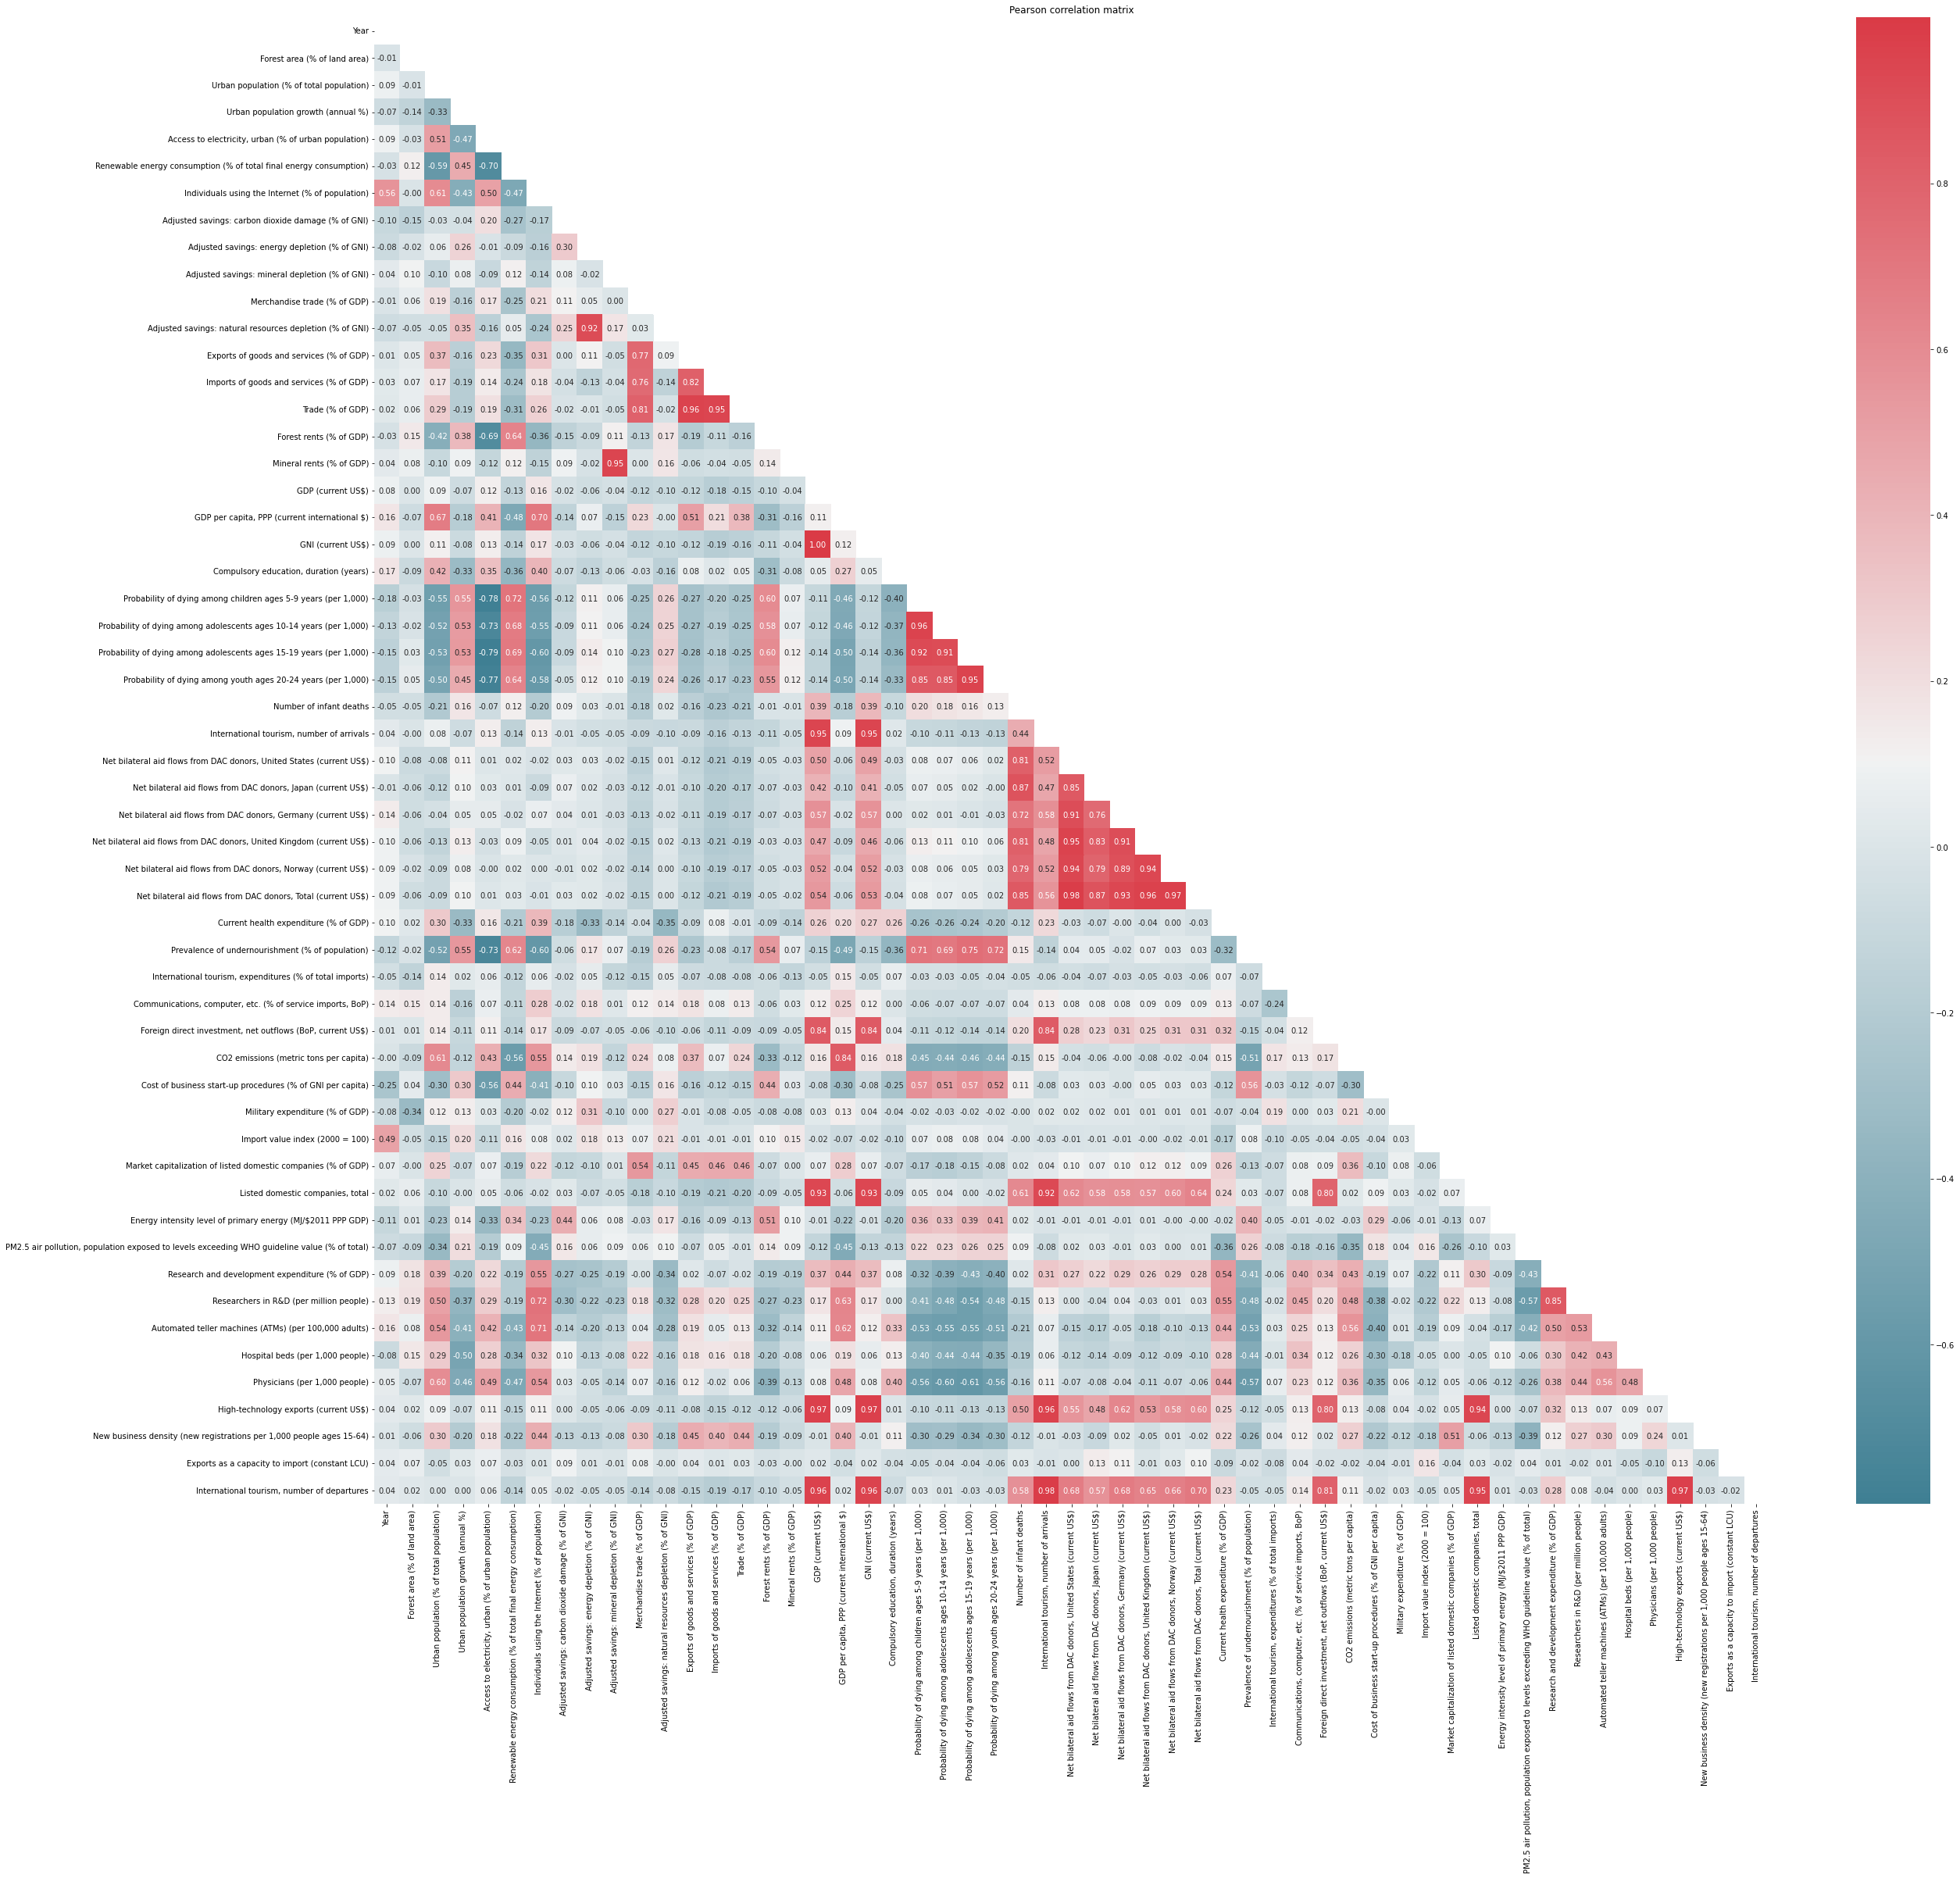

In [181]:
plt.figure(figsize=(40,35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation_mat = dfChkFtrs.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_mat, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=correlation_mat, annot=True, mask=mask, cmap=cmap, fmt='.2f')
# plt.xticks(rotation=80)
plt.title("Pearson correlation matrix")
plt.savefig('Images/wdi_corr.png')

In [77]:
list(set(ftrsOG2) & set(dfAggAllCountryFiltr1.columns))

55

In [79]:
findMissing(ftrsOG2, dfAggAllCountryFiltr1.columns, len(ftrsOG2), len(dfAggAllCountryFiltr1.columns))

Urban land area (sq. km) Market capitalization of listed domestic companies (current US$) Market capitalization of listed domestic companies (% of GDP) S&P Global Equity Indices (annual % change) Listed domestic companies, total Net bilateral aid flows from DAC donors, Greece (current US$) Net bilateral aid flows from DAC donors, Hungary (current US$) Net bilateral aid flows from DAC donors, Ireland (current US$) Net ODA provided to the least developed countries (% of GNI) Net ODA provided, total (% of GNI) Energy intensity level of primary energy (MJ/$2011 PPP GDP) PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) Bird species, threatened Disaster risk reduction progress score (1-5 scale; 5=best) Droughts, floods, extreme temperatures (% of population, average 1990-2009) Fish species, threatened Plant species (higher), threatened Mammal species, threatened Population livin

In [78]:
def findMissing(a, b, n, m):
 
    for i in range(n):
        for j in range(m):
            if (a[i] == b[j]):
                break
 
        if (j == m - 1):
            print(a[i], end = " ")

In [63]:
dfAggAllCountryFiltr1= dfAggAllCountryNew[[*selectedFtrsOG]]

KeyError: ignored

In [ ]:
dfAggAllCountryNew = dfAggAllCountryNew.dropna(axis=0, thresh=20)

In [ ]:
dfAggAllCountryNew = dfAggAllCountryNew.dropna(axis=1, thresh=1000)

In [ ]:
ftrlist  = list(dfAggAllCountryNew.columns)
ftrlist[2:]

['Year',
 'Market capitalization of listed domestic companies (% of GDP)',
 'Listed domestic companies, total',
 'Net bilateral aid flows from DAC donors, Total (current US$)',
 'Access to electricity, urban (% of urban population)',
 'Renewable energy consumption (% of total final energy consumption)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'Research and development expenditure (% of GDP)',
 'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
 'Automated teller machines (ATMs) (per 100,000 adults)',
 'New business density (new registrations per 1,000 people ages 15-64)',
 'Investment in energy with private participation (current US$)',
 'Fixed broadband subscriptions',
 'Air transport, registered carrier departures worldwide',
 'Individuals using the Internet (% of population)',
 'Adjusted savings: energy depletion (% of GNI)',
 'Exports of goods and services (%

In [ ]:
dfAggAllCountryNew

,Country Name,Country Code,Year,Market capitalization of listed domestic companies (% of GDP),"Listed domestic companies, total","Net bilateral aid flows from DAC donors, Total (current US$)","Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),CO2 emissions (kg per PPP $ of GDP),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,"Literacy rate, adult total (% of people ages 15 and above)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)",Number of infant deaths,"Hospital beds (per 1,000 people)",Current health expenditure (% of GDP),Researchers in R&D (per million people),Prevalence of undernourishment (% of population),"International tourism, number of arrivals","International tourism, number of departures",High-technology exports (current US$)
7981,Africa Western and Central,AFW,1990,NaN,NaN,4.835200e+09,NaN,86.082214,0.254502,58.079633,...,NaN,NaN,1014926.0,1.474776,NaN,NaN,NaN,NaN,NaN,NaN
7985,Early-demographic dividend,EAR,1990,NaN,NaN,1.728354e+10,NaN,37.071102,0.437841,56.553270,...,58.656250,NaN,4992330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7986,East Asia & Pacific,EAS,1990,82.272715,4906.0,7.109500e+09,NaN,26.196254,0.770358,44.916304,...,80.412437,NaN,1760070.0,2.341232,NaN,NaN,NaN,NaN,NaN,NaN
7987,East Asia & Pacific (excluding high income),EAP,1990,NaN,NaN,6.400870e+09,NaN,36.997406,1.152849,48.413421,...,79.787483,NaN,1742398.0,2.278771,NaN,NaN,NaN,NaN,NaN,NaN
7988,East Asia & Pacific (IDA & IBRD countries),TEA,1990,NaN,NaN,6.220480e+09,NaN,38.039122,1.101069,48.542032,...,79.521820,NaN,1728544.0,2.278771,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,Singapore,SGP,2020,191.946348,459.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,NaN,NaN,NaN,NaN,2742000.0,1543000.0,1.604913e+11
16183,Slovenia,SVN,2020,15.765276,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,1216000.0,1892000.0,2.542422e+09
16188,Spain,ESP,2020,59.241807,2711.0,NaN,NaN,NaN,NaN,NaN,...,98.594460,NaN,1039.0,NaN,NaN,NaN,NaN,36410000.0,6236000.0,1.572522e+10
16207,Turkey,TUR,2020,32.984517,371.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10588.0,NaN,NaN,NaN,NaN,15971000.0,2243000.0,4.172700e+09


In [ ]:
for val in ftrlist[2:]:
  dfAggAllCountryNew[val] = dfAggAllCountryNew.groupby('Year')[val].transform(lambda x: x.fillna(x.mean()))

In [ ]:
dfAggAllCountryNew.fillna(0)

,Country Name,Country Code,Year,Market capitalization of listed domestic companies (% of GDP),"Listed domestic companies, total","Net bilateral aid flows from DAC donors, Total (current US$)","Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),CO2 emissions (kg per PPP $ of GDP),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,"Literacy rate, adult total (% of people ages 15 and above)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)",Number of infant deaths,"Hospital beds (per 1,000 people)",Current health expenditure (% of GDP),Researchers in R&D (per million people),Prevalence of undernourishment (% of population),"International tourism, number of arrivals","International tourism, number of departures",High-technology exports (current US$)
7981,Africa Western and Central,AFW,1990,45.052301,2706.48,4.835200e+09,98.161859,86.082214,0.254502,58.079633,...,70.117428,0.0,1014926.0,1.474776,0.0,0.0,0.0,0.0,0.0,0.000000e+00
7985,Early-demographic dividend,EAR,1990,45.052301,2706.48,1.728354e+10,98.161859,37.071102,0.437841,56.553270,...,58.656250,0.0,4992330.0,3.678487,0.0,0.0,0.0,0.0,0.0,0.000000e+00
7986,East Asia & Pacific,EAS,1990,82.272715,4906.00,7.109500e+09,98.161859,26.196254,0.770358,44.916304,...,80.412437,0.0,1760070.0,2.341232,0.0,0.0,0.0,0.0,0.0,0.000000e+00
7987,East Asia & Pacific (excluding high income),EAP,1990,45.052301,2706.48,6.400870e+09,98.161859,36.997406,1.152849,48.413421,...,79.787483,0.0,1742398.0,2.278771,0.0,0.0,0.0,0.0,0.0,0.000000e+00
7988,East Asia & Pacific (IDA & IBRD countries),TEA,1990,45.052301,2706.48,6.220480e+09,98.161859,38.039122,1.101069,48.542032,...,79.521820,0.0,1728544.0,2.278771,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,Singapore,SGP,2020,191.946348,459.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,96.024371,0.0,92.0,0.000000,0.0,0.0,0.0,2742000.0,1543000.0,1.604913e+11
16183,Slovenia,SVN,2020,15.765276,27.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,96.024371,0.0,34.0,0.000000,0.0,0.0,0.0,1216000.0,1892000.0,2.542422e+09
16188,Spain,ESP,2020,59.241807,2711.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,98.594460,0.0,1039.0,0.000000,0.0,0.0,0.0,36410000.0,6236000.0,1.572522e+10
16207,Turkey,TUR,2020,32.984517,371.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,96.024371,0.0,10588.0,0.000000,0.0,0.0,0.0,15971000.0,2243000.0,4.172700e+09


In [ ]:
dfAggAllCountryNew.isna().sum()

Country Name                                                                                                          0
Country Code                                                                                                          0
Year                                                                                                                  0
Market capitalization of listed domestic companies (% of GDP)                                                         0
Listed domestic companies, total                                                                                      0
Net bilateral aid flows from DAC donors, Total (current US$)                                                         28
Access to electricity, urban (% of urban population)                                                                 28
Renewable energy consumption (% of total final energy consumption)                                                  219
CO2 emissions (kg per PPP $ of GDP)     

In [ ]:
dfAggAllCountryNew['Total alcohol consumption per capita'] = dfAggAllCountryNew['Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)']
dfAggAllCountryNew['Water productivity, total'] = dfAggAllCountryNew['Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)']
dfAggAllCountryNew['PM2.5 air pollution, mean annual exposure'] =dfAggAllCountryNew['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']
dfAggAllCountryNew['New business density (per 1000 ppl'] = dfAggAllCountryNew['New business density (new registrations per 1,000 people ages 15-64)'] 
dfAggAllCountryNew['Renewable energy consumption (% of total)'] = dfAggAllCountryNew['Renewable energy consumption (% of total final energy consumption)']

In [ ]:
dfAggAllCountryNew.drop(['Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)',
'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'New business density (new registrations per 1,000 people ages 15-64)',
'Renewable energy consumption (% of total final energy consumption)'], axis=1, inplace=True)

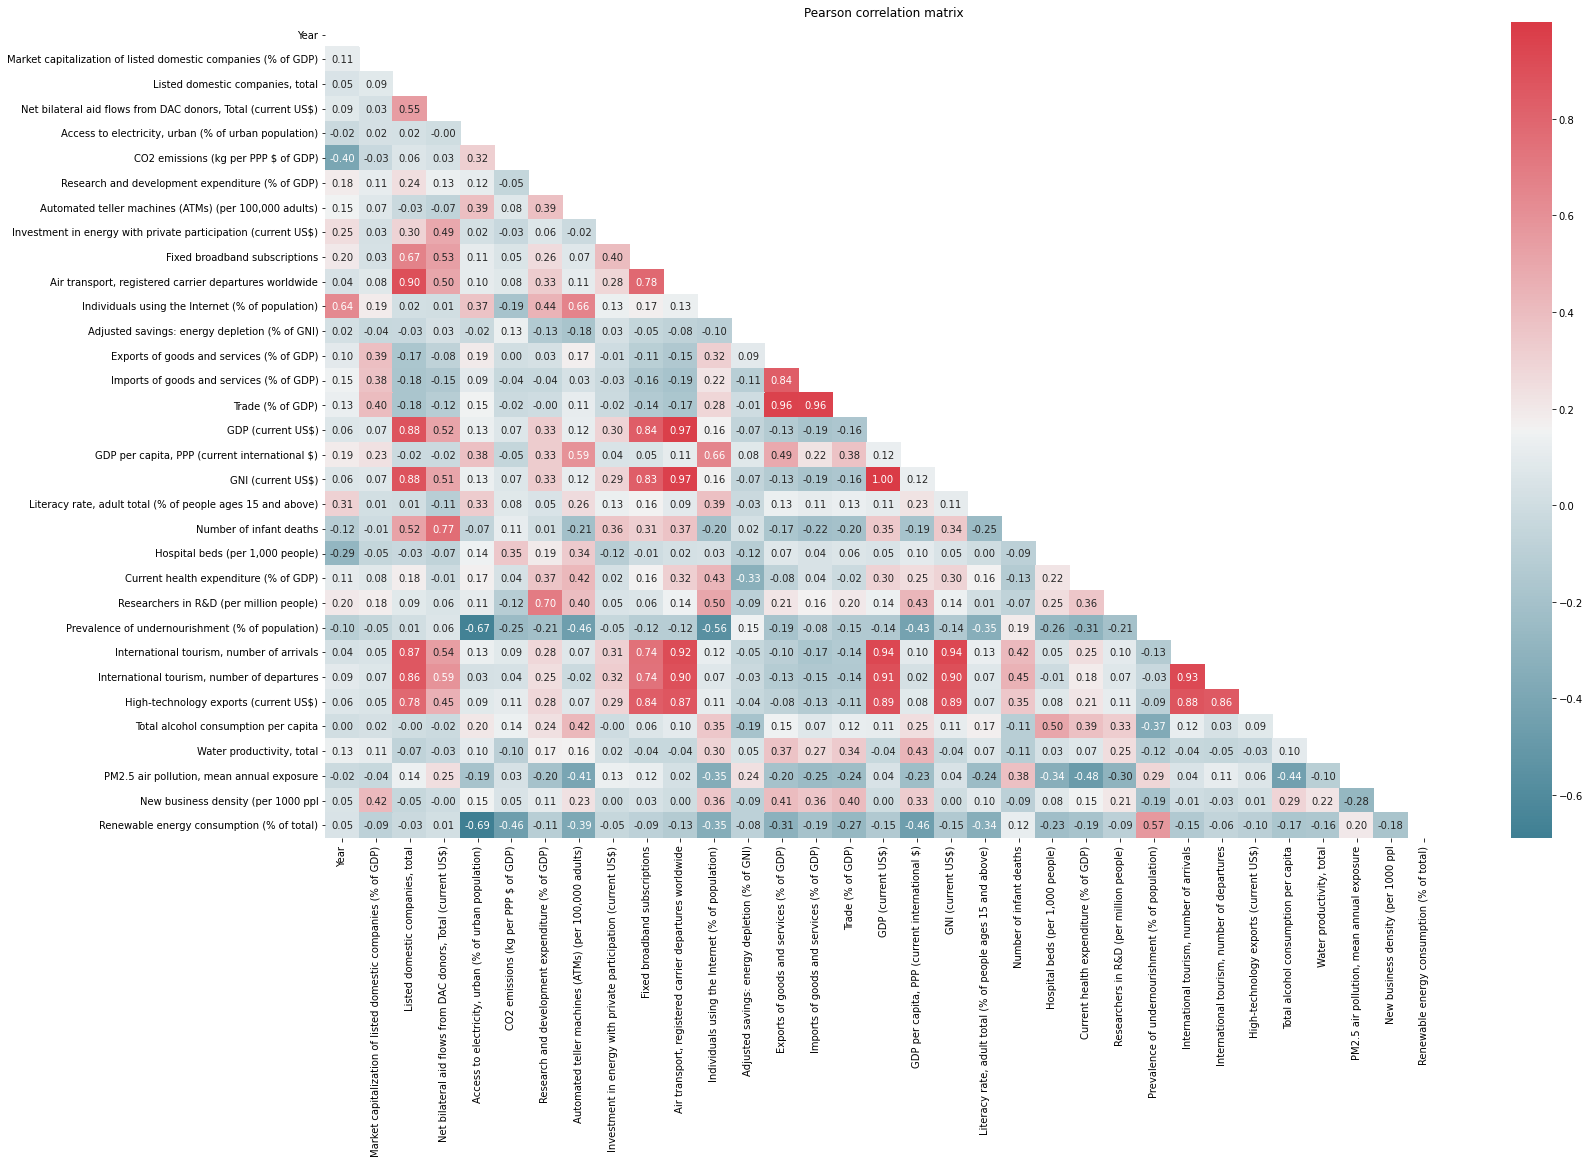

In [ ]:
plt.figure(figsize=(25,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation_mat = dfAggAllCountryNew.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_mat, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=correlation_mat, annot=True, mask=mask, cmap=cmap, fmt='.2f')
# plt.xticks(rotation=80)
plt.title("Pearson correlation matrix")
plt.savefig('Images/wdi_corr.png')

In [ ]:
dfAggAllCountryNew.columns

Index(['Country Name', 'Country Code', 'Year',
       'Market capitalization of listed domestic companies (% of GDP)',
       'Listed domestic companies, total',
       'Net bilateral aid flows from DAC donors, Total (current US$)',
       'Access to electricity, urban (% of urban population)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'Research and development expenditure (% of GDP)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Investment in energy with private participation (current US$)',
       'Fixed broadband subscriptions',
       'Air transport, registered carrier departures worldwide',
       'Individuals using the Internet (% of population)',
       'Adjusted savings: energy depletion (% of GNI)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)', 'Trade (% of GDP)',
       'GDP (current US$)', 'GDP per capita, PPP (current international $)',
       'GNI (current US$)',
       'Literacy 

In [ ]:
df_bzn_gp = dfAggAllCountryNew.groupby(['Year'], as_index=True)['New business density (per 1000 ppl'].agg({
  'sum', 'count','mean'}).reset_index()
df_bzn_gp= df_bzn_gp[df_bzn_gp.Year>2005]
df_bzn_gp

,Year,count,sum,mean
16,2006,214,687.934053,3.214645
17,2007,225,783.940678,3.484181
18,2008,219,675.439215,3.084197
19,2009,229,618.393613,2.700409
20,2010,236,684.025808,2.898414
21,2011,232,687.171137,2.961945
22,2012,231,702.186707,3.039769
23,2013,232,740.037616,3.189817
24,2014,234,765.332314,3.270651
25,2015,235,760.542396,3.236351


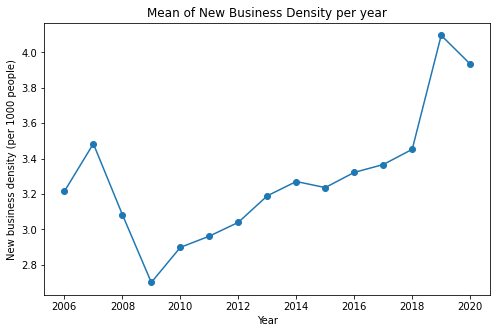

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Mean of New Business Density per year')
plt.xlabel('Year')
plt.ylabel('New business density (per 1000 people)')
# plt.legend('sales in 2013')
plt.plot(df_bzn_gp['Year'], df_bzn_gp['mean'],"-o")
plt.savefig('Images/bznDensity.png')

In [ ]:
df_elec_gp = dfAggAllCountryNew.groupby(['Year'], as_index=True)['Access to electricity, urban (% of urban population)'].agg({
  'sum', 'count','mean'}).reset_index()
df_elec_gp= df_elec_gp[df_elec_gp.Year<2020]
df_elec_gp

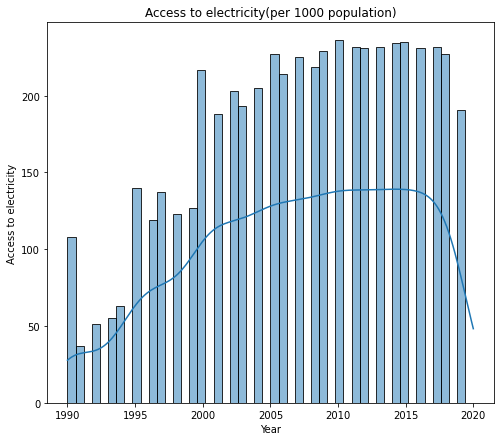

In [ ]:
plt.figure(figsize=(8,7))
plt.title('Access to electricity(per 1000 population)')
plt.xlabel('Year')
plt.ylabel('Access to electricity')
# plt.legend('sales in 2013')
sns.histplot(dfAggAllCountryNew['Year'], binwidth=0.6, kde=True, palette="gist_ncar")
plt.savefig('Images/histplotAccessElec.png')
# plt.plot(df_elec_gp['Year'], df_elec_gp['sum'],"-o")

In [ ]:
dataSc = dfAggAllCountryNew[dfAggAllCountryNew['New business density (per 1000 ppl']>0]
dataSc = dataSc[dataSc['GDP (current US$)']>0]

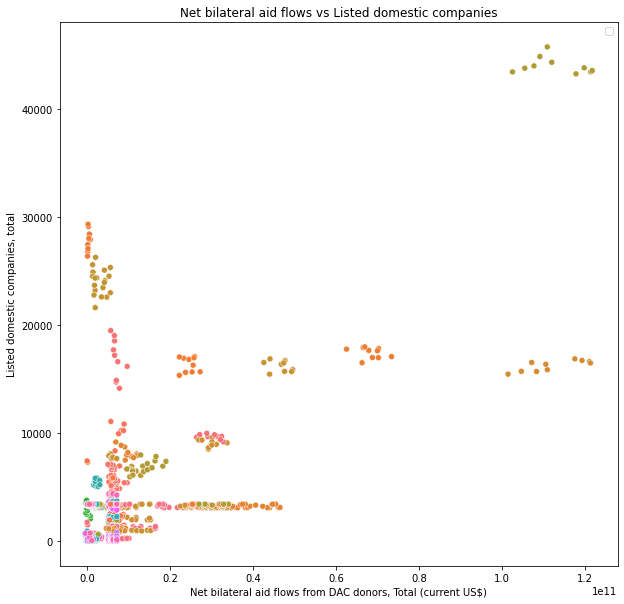

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Net bilateral aid flows vs Listed domestic companies')
plt.xlabel('Net bilateral aid flows from DAC donors, Total (current US$)')
plt.ylabel('Listed domestic companies, total')
plt.legend('sales in 2013')
sns.scatterplot(data=dfAggAllCountryNew[dfAggAllCountryNew['Year']>=2010], y='Listed domestic companies, total', x= 'Net bilateral aid flows from DAC donors, Total (current US$)',hue = "Country Code", legend=False)
plt.savefig('Images/donVsCompany.png')

In [ ]:
dfAggAllCountry = [[]]

arrYrColmns= ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
              '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
              '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
              '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
              '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
              '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021']

arrYr= [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

# yr = 9
for yr in range(len(arrYrColmns)):
  dfRet = createDFEachYr(arrYrColmns[yr], int(arrYrColmns[yr]))
  if yr ==0:
    dfAggAllCountry = dfRet
  else:
    dfAggAllCountry = pd.concat([dfAggAllCountry, dfRet])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':


In [ ]:
def createDFEachYr(index, newYr):
  df_country_tmp= [[]]
  df_country_tmp = pd.DataFrame(df_country['Country Name'].unique(), columns=['Country Name'])
  df_country_tmp['Country Code'] = pd.DataFrame(df_country['Country Code'].unique())
  # print(df_country_tmp)
  arrYearTmp = [newYr]*266

  for ftr in arrFeatures:
    newdf = df_country[df_country['Indicator Name'] == ftr][['Country Code', index]]
    df_country_tmp[ftr] = newdf[[index]].reset_index(drop=True)

  df_country_tmp['Year'] = pd.DataFrame(arrYearTmp)

  return df_country_tmp

In [ ]:
dfAggAllCountry

,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV,Year
0,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,Caribbean small states,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,Central Europe and the Baltics,CEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
262,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
263,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [ ]:
df_country_updated['Year'] = pd.DataFrame(arrYear)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [ ]:
ftr = 'Access to electricity (% of population)'
df_country_updated['Mango'] = df_country[df_country['Series Name']== ftr][['2007 [YR2007]']].reset_index(drop=True)

In [ ]:
df_country_updated.drop(['Mango'],axis=1, inplace =True)

# *Streaming Trial Income* #

In [ ]:
kmeansres = KMeans(n_clusters =3, init = 'k-means++').fit(df)

In [ ]:
kmeansres.cluster_centers_

array([[1.51785714e+00, 8.94642857e+00, 4.56071429e+00, 5.35714286e-02,
        2.50000000e-01, 1.66785714e+01, 1.06553571e+01, 2.53821429e+02,
        2.23107143e+02, 6.07142857e-01, 5.35714286e-02, 3.68214286e+00,
        1.18464286e+01, 6.55357143e+01, 1.05714286e+01, 1.06563291e+06,
        1.43035714e+01, 3.73214286e+00, 9.07827679e+04, 7.71852321e+04,
        6.36607143e+01],
       [1.33333333e+00, 1.25000000e+01, 4.50000000e+00, 8.33333333e-02,
        8.33333333e-02, 1.60000000e+01, 1.72500000e+01, 3.27333333e+02,
        2.21666667e+02, 8.33333333e-01, 3.46944695e-18, 3.94166667e+00,
        1.01000000e+01, 7.39166667e+01, 1.25833333e+01, 3.19275000e+06,
        1.21666667e+01, 3.08333333e+00, 1.86652750e+05, 1.53910750e+05,
        8.00000000e+01],
       [1.59148936e+00, 9.70921986e+00, 2.15205674e+00, 2.12765957e-02,
        8.22695035e-02, 1.03460993e+01, 3.04453901e+00, 3.59797163e+02,
        2.19143262e+02, 2.34042553e-01, 2.12765957e-02, 1.14241135e+00,
        4.9713

In [ ]:
kmeansres.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from random import shuffle, randrange
from collections import defaultdict

import numpy as np #for numeric algebra and arrays

import math

In [ ]:
math.pow(2,1/2)

1.4142135623730951

In [ ]:
(math.log2(2738) - 10.46)/10.46

0.09167368367666341

In [ ]:
from flask import Flask, redirect, url_for, render_template, jsonify, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np
import json
import random

from sklearn.cluster import KMeans

In [ ]:
cov_mat = np.cov(df.T)

In [ ]:
cov_mat

array([[ 1.73579486e+00, -1.55152190e-01, -8.87960909e-02,
         2.51191442e-03, -3.17315620e-02, -1.04751523e+00,
         1.56153721e+00, -4.52085777e+00,  6.86114593e-01,
        -2.41824129e-02,  1.97065467e-03,  1.96196938e-01,
        -7.05263458e-01, -1.81593315e+00,  1.69627117e-01,
        -2.25725712e+04,  1.11223012e+00, -2.10918700e-01,
         4.86290695e+02,  9.44655866e+02,  3.40262687e+00],
       [-1.55152190e-01,  3.60870004e+01, -4.71318261e-01,
         1.00409548e-02, -8.53648727e-02, -1.44316773e+00,
        -2.27610816e+00,  4.87380950e+02, -6.51051016e+00,
         2.95683663e-01,  4.46748755e-03, -5.74421372e-01,
        -9.23925356e-02, -3.11861632e+00, -2.88672422e-01,
         6.02322500e+04, -3.26981044e+00, -7.12964763e-01,
         5.27614257e+03, -2.55279043e+03, -1.38708618e+00],
       [-8.87960909e-02, -4.71318261e-01,  6.21204901e+00,
         9.04183619e-02,  5.84327598e-01,  1.57388978e+01,
         1.03760620e+01, -7.01328868e+01, -3.45812107e

In [ ]:
eigvalue, eigvector = np.linalg.eig(cov_mat)

In [ ]:
eigvalue

array([2.39658938e+11, 2.18290533e+09, 1.61340404e+09, 3.91440651e+04,
       1.50299627e+03, 3.43587150e+02, 1.24753276e+02, 7.38673340e+01,
       6.26904100e+01, 4.39423543e+01, 3.35757555e+01, 2.93685920e+01,
       8.66296010e+00, 2.31616320e+00, 1.54003034e+00, 6.32573936e-01,
       1.72423066e-01, 6.25854278e-02, 1.91831915e-02, 6.06420406e-03,
       7.09079122e-04])

In [ ]:
eigvector

array([[ 9.35558465e-08,  1.19283904e-06, -6.63603850e-07,
         1.48790539e-04, -9.00741544e-04, -2.99969159e-03,
        -3.14211519e-02, -1.56609775e-02, -2.77470523e-03,
         2.46378017e-02,  3.11871310e-04,  2.21824779e-03,
        -4.39929628e-02, -8.41646649e-02,  9.94386857e-01,
        -1.50034373e-02, -6.70289455e-03,  8.74825380e-04,
        -5.57881339e-03,  3.38473910e-03,  4.52131798e-04],
       [-2.51366712e-07, -4.66809870e-07,  3.51194706e-06,
        -1.25115086e-02,  8.91009831e-03,  2.07401297e-02,
        -4.51562835e-03, -4.82438109e-02, -9.08306919e-02,
        -4.14539311e-02, -4.69022144e-02, -9.89814531e-01,
         6.96970626e-02, -1.02770195e-02,  4.54660576e-03,
         9.28686630e-03,  3.11455549e-03, -1.98503606e-03,
         8.80931884e-04,  3.40690915e-04,  2.19559201e-04],
       [-1.43153919e-06,  7.45473869e-06,  1.13999336e-05,
         1.53410082e-03,  3.87000519e-02,  1.12977836e-02,
        -1.61524098e-02,  4.76723420e-02, -5.79443880e

In [ ]:
idx = eigvalue.argsort()[::-1]
eigvalue = eigvalue[idx]
eigvector = eigvector[:, idx]

In [ ]:
eigvalue

array([2.39658938e+11, 2.18290533e+09, 1.61340404e+09, 3.91440651e+04,
       1.50299627e+03, 3.43587150e+02, 1.24753276e+02, 7.38673340e+01,
       6.26904100e+01, 4.39423543e+01, 3.35757555e+01, 2.93685920e+01,
       8.66296010e+00, 2.31616320e+00, 1.54003034e+00, 6.32573936e-01,
       1.72423066e-01, 6.25854278e-02, 1.91831915e-02, 6.06420406e-03,
       7.09079122e-04])

In [ ]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
eigvector

array([[ 9.35558465e-08,  1.19283904e-06, -6.63603850e-07,
         1.48790539e-04, -9.00741544e-04, -2.99969159e-03,
        -3.14211519e-02, -1.56609775e-02, -2.77470523e-03,
         2.46378017e-02,  3.11871310e-04,  2.21824779e-03,
        -4.39929628e-02, -8.41646649e-02,  9.94386857e-01,
        -1.50034373e-02, -6.70289455e-03,  8.74825380e-04,
        -5.57881339e-03,  3.38473910e-03,  4.52131798e-04],
       [-2.51366712e-07, -4.66809870e-07,  3.51194706e-06,
        -1.25115086e-02,  8.91009831e-03,  2.07401297e-02,
        -4.51562835e-03, -4.82438109e-02, -9.08306919e-02,
        -4.14539311e-02, -4.69022144e-02, -9.89814531e-01,
         6.96970626e-02, -1.02770195e-02,  4.54660576e-03,
         9.28686630e-03,  3.11455549e-03, -1.98503606e-03,
         8.80931884e-04,  3.40690915e-04,  2.19559201e-04],
       [-1.43153919e-06,  7.45473869e-06,  1.13999336e-05,
         1.53410082e-03,  3.87000519e-02,  1.12977836e-02,
        -1.61524098e-02,  4.76723420e-02, -5.79443880e

In [ ]:
pca_model = PCA(n_components = len(df.columns))

In [ ]:
pca_model

PCA(n_components=21)

In [ ]:
pca_projections = pca_model.fit_transform(df)

In [ ]:
pca_projections

array([[-1.75008022e+05, -9.25250127e+03, -4.30409300e+03, ...,
        -9.31751244e-03,  5.87339581e-03, -8.09581155e-04],
       [-7.48524747e+03, -1.58398464e+04,  6.70910150e+03, ...,
         1.07186510e-03,  1.57913227e-02,  3.28811601e-03],
       [-1.85258373e+05, -8.63831089e+03, -4.42133611e+03, ...,
         4.15383226e-03, -5.26821887e-03, -2.71639463e-03],
       ...,
       [-1.70003592e+05, -9.15193578e+03, -3.96439724e+03, ...,
         6.66934465e-01,  1.49087353e-01,  6.11928367e-03],
       [-1.85540737e+05, -8.61871991e+03, -4.42142063e+03, ...,
         2.57927115e-03,  9.68468157e-03,  2.57385433e-03],
       [-1.78151468e+05, -9.07875726e+03, -4.51055467e+03, ...,
        -1.04943383e-01, -6.64698596e-02, -5.80177167e-02]])

In [ ]:
pca_projections[0]

array([-1.75008022e+05, -9.25250127e+03, -4.30409300e+03, -7.41205599e+01,
        2.72262713e+01, -9.16606490e+00,  1.04426851e+00, -6.19623978e-01,
       -7.51623876e-01, -7.89566080e-02,  8.17413422e+00, -4.02610189e+00,
        1.92837593e-01, -5.51611199e-02,  1.69533353e+00,  8.23769640e-02,
       -9.10642020e-02,  6.34346960e-02, -9.31751244e-03,  5.87339581e-03,
       -8.09581155e-04])

In [ ]:
pca_projections[:, 0]

array([-1.75008022e+05, -7.48524747e+03, -1.85258373e+05, -1.85258373e+05,
        1.16880590e+05,  1.66912538e+06, -1.69925473e+05, -7.52866734e+04,
       -1.85043433e+05, -1.79804848e+05, -1.79804848e+05, -1.85083309e+05,
       -1.83580878e+05, -1.13442816e+05, -1.86055163e+05, -1.79363865e+05,
        2.87551014e+04, -1.80956750e+05, -1.86156867e+05, -1.86156868e+05,
       -1.31290656e+05, -1.31290656e+05,  7.65636762e+05,  7.65636762e+05,
        1.44123508e+05, -1.65442872e+05, -1.85422168e+05, -1.84841715e+05,
       -1.66567313e+05, -1.66567313e+05,  8.92315911e+05, -1.85853773e+05,
       -1.64214035e+05, -1.84990326e+05,  5.32291630e+03, -1.85869118e+05,
       -6.18418015e+04,  3.64236645e+05,  3.37256351e+06,  1.13588420e+05,
        8.96949928e+05,  2.98909789e+05, -1.68406468e+05, -1.85695671e+05,
       -1.85695671e+05, -1.30527553e+05, -1.30527553e+05, -1.85211833e+05,
       -1.77285210e+05, -1.77285210e+05, -1.84982156e+05,  2.38055212e+05,
       -1.80932411e+05, -

In [ ]:
arr = [[1,2,3,4],[5,6,7,8]]

In [ ]:
arr[:,1]

TypeError: ignored

In [ ]:
json.dumps(df.to_dict("records"))

'[{"position": 0, "team": 12, "xP": 1.0, "assists": 0, "bonus": 0, "bps": 6, "creativity": 0.0, "element": 286, "fixture": 228, "goals_conceded": 0, "goals_scored": 0, "ict_index": 0.0, "influence": 0.0, "minutes": 0, "opponent_team": 19, "selected": 11164, "threat": 0.0, "total_points": 1, "transfers_in": 42, "transfers_out": 368, "value": 49}, {"position": 1, "team": 1, "xP": 1.0, "assists": 0, "bonus": 0, "bps": 6, "creativity": 0.0, "element": 49, "fixture": 225, "goals_conceded": 0, "goals_scored": 0, "ict_index": 0.0, "influence": 0.0, "minutes": 0, "opponent_team": 8, "selected": 178454, "threat": 0.0, "total_points": 1, "transfers_in": 0, "transfers_out": 15944, "value": 45}, {"position": 3, "team": 17, "xP": 1.0, "assists": 0, "bonus": 0, "bps": 6, "creativity": 0.0, "element": 394, "fixture": 230, "goals_conceded": 0, "goals_scored": 0, "ict_index": 0.0, "influence": 0.0, "minutes": 0, "opponent_team": 15, "selected": 901, "threat": 0.0, "total_points": 1, "transfers_in": 0, 

In [ ]:
pca_biplot = {}

pca_biplot['x'] = pca_projections[:, 0]
pca_biplot['y'] = pca_projections[:, 1]

In [ ]:
pca_model.components_[0,:]

array([-9.35558468e-08,  2.51366712e-07,  1.43153919e-06,  3.78513744e-08,
        7.67911271e-08,  3.76074331e-06,  5.92527009e-06, -5.53851552e-05,
        1.81648900e-06,  2.51008710e-07,  6.50533389e-09,  1.53016595e-06,
        3.90935040e-06,  2.58341105e-05,  3.88405625e-07,  9.96756719e-01,
        5.49794596e-06,  9.18221426e-07,  6.30975531e-02,  4.99473434e-02,
        1.15455242e-05])

In [ ]:
pca_model.components_[0]

array([-9.35558468e-08,  2.51366712e-07,  1.43153919e-06,  3.78513744e-08,
        7.67911271e-08,  3.76074331e-06,  5.92527009e-06, -5.53851552e-05,
        1.81648900e-06,  2.51008710e-07,  6.50533389e-09,  1.53016595e-06,
        3.90935040e-06,  2.58341105e-05,  3.88405625e-07,  9.96756719e-01,
        5.49794596e-06,  9.18221426e-07,  6.30975531e-02,  4.99473434e-02,
        1.15455242e-05])

In [ ]:
pca_projections[0]

array([-1.75008022e+05, -9.25250127e+03, -4.30409300e+03, -7.41205599e+01,
        2.72262713e+01, -9.16606490e+00,  1.04426851e+00, -6.19623978e-01,
       -7.51623876e-01, -7.89566080e-02,  8.17413422e+00, -4.02610189e+00,
        1.92837593e-01, -5.51611199e-02,  1.69533353e+00,  8.23769640e-02,
       -9.10642020e-02,  6.34346960e-02, -9.31751244e-03,  5.87339581e-03,
       -8.09581155e-04])

# MDS


In [ ]:
df

,position,team,xP,assists,bonus,bps,creativity,element,fixture,goals_conceded,...,ict_index,influence,minutes,opponent_team,selected,threat,total_points,transfers_in,transfers_out,value
0,0,12,1.0,0,0,6,0.0,286,228,0,...,0.0,0.0,0,19,11164,0.0,1,42,368,49
1,1,1,1.0,0,0,6,0.0,49,225,0,...,0.0,0.0,0,8,178454,0.0,1,0,15944,45
2,3,17,1.0,0,0,6,0.0,394,230,0,...,0.0,0.0,0,15,901,0.0,1,0,8,45
3,3,17,1.0,0,0,6,0.0,394,164,0,...,0.0,0.0,0,5,901,0.0,1,0,8,45
4,3,15,5.0,0,0,22,28.8,341,229,1,...,5.1,22.2,90,12,300618,0.0,3,36877,21374,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,3,9,1.0,0,0,6,0.0,216,227,0,...,0.0,0.0,0,4,74867,0.0,1,22,2195,48
769,0,13,0.6,0,0,6,0.0,292,226,0,...,0.0,0.0,0,10,16202,0.0,1,173,765,49
770,3,15,3.7,1,0,17,11.0,336,229,0,...,2.8,17.2,45,12,16138,0.0,5,305,968,59
771,2,3,1.0,0,0,6,0.0,65,227,0,...,0.0,0.0,0,9,618,0.0,1,0,2,45


In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
embedding = MDS(n_components=2)

In [ ]:
X_transformed = embedding.fit_transform(data_sc)

In [ ]:
X_transformed

array([[174225.95291364, -20882.20064027],
       [  7272.79219271,   -470.88017322],
       [184430.53777331, -21992.13750801],
       ...,
       [169262.39994597, -20128.18642594],
       [184737.3217676 , -21790.85079392],
       [177362.92846418, -21212.03765926]])

In [ ]:
Xfit = embedding.fit(data_sc)

In [ ]:
len(Xfit.embedding_)

773

In [ ]:
 Xfit.dissimilarity_matrix_

array([[     0.        , 168013.73181083,  10269.96918204, ...,
          5017.48024112,  10554.75622646,   3157.71390408],
       [168013.73181083,      0.        , 178267.0560255 , ...,
        163005.95955047, 178549.12636583, 171168.56410013],
       [ 10269.96918204, 178267.0560255 ,      0.        , ...,
         15270.46047014,    434.29022554,   7121.16128872],
       ...,
       [  5017.48024112, 163005.95955047,  15270.46047014, ...,
             0.        ,  15555.48041592,   8166.94471452],
       [ 10554.75622646, 178549.12636583,    434.29022554, ...,
         15555.48041592,      0.        ,   7412.44481261],
       [  3157.71390408, 171168.56410013,   7121.16128872, ...,
          8166.94471452,   7412.44481261,      0.        ]])

In [ ]:
similarities_euc = euclidean_distances(df)

In [ ]:
Xfit_ed = embedding.fit(similarities_euc)

In [ ]:
Xfit_ed.embedding_

array([[ 29317.15695376, 172474.81177602],
       [ -1218.55447987,   7064.69622149],
       [ 31002.54858398, 182603.22941657],
       ...,
       [ 28371.76993437, 167547.85763432],
       [ 30809.0245901 , 182924.0170263 ],
       [ 29897.50506412, 175576.4028814 ]])

In [ ]:
Xfit_ed.dissimilarity_matrix_

array([[     0.        , 168013.73181083,  10269.96918204, ...,
          5017.48024112,  10554.75622646,   3157.71390408],
       [168013.73181083,      0.        , 178267.0560255 , ...,
        163005.95955047, 178549.12636583, 171168.56410013],
       [ 10269.96918204, 178267.0560255 ,      0.        , ...,
         15270.46047014,    434.29022554,   7121.16128872],
       ...,
       [  5017.48024112, 163005.95955047,  15270.46047014, ...,
             0.        ,  15555.48041592,   8166.94471452],
       [ 10554.75622646, 178549.12636583,    434.29022554, ...,
         15555.48041592,      0.        ,   7412.44481261],
       [  3157.71390408, 171168.56410013,   7121.16128872, ...,
          8166.94471452,   7412.44481261,      0.        ]])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
data_sc = pd.DataFrame(scaled_features, index=df.index)

In [ ]:
similarities_euc_sc = euclidean_distances(data_sc)

In [ ]:
Xfit_ed_sc = embedding.fit(similarities_euc_sc)

In [ ]:
Xfit_ed.embedding_

array([[ 1.18737968,  0.48045846],
       [ 2.52059834, -1.10397667],
       [ 0.38993681,  1.68194574],
       ...,
       [ 2.20127884, -6.3656326 ],
       [ 2.07262626, -0.91236433],
       [-0.5697068 ,  1.64535198]])

In [ ]:
mds = MDS(n_components=2, dissimilarity='precomputed')

In [ ]:
1-np.abs(data_sc.corr())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.980397,0.972959,0.988309,0.947440,0.908402,0.870989,0.982831,0.971905,0.970677,...,0.940148,0.949650,0.965375,0.977889,0.964890,0.923022,0.929326,0.993291,0.985075,0.783545
1,0.980397,0.000000,0.968521,0.989751,0.968989,0.972323,0.958758,0.594051,0.941532,0.921367,...,0.961568,0.998553,0.986958,0.991747,0.979453,0.950367,0.947605,0.984035,0.991154,0.980648
2,0.972959,0.968521,0.000000,0.777555,0.488379,0.272504,0.546853,0.859207,0.925148,0.772397,...,0.375209,0.359103,0.323018,0.988682,0.719595,0.583631,0.238587,0.678110,0.938924,0.748238
3,0.988309,0.989751,0.777555,0.000000,0.771105,0.702576,0.630070,0.925298,0.948976,0.925608,...,0.668728,0.706275,0.813053,0.964050,0.886928,0.841673,0.637226,0.854302,0.949997,0.837136
4,0.947440,0.968989,0.488379,0.771105,0.000000,0.362735,0.771939,0.954033,0.993180,0.971719,...,0.543844,0.373656,0.692724,0.998849,0.918252,0.763778,0.265720,0.873507,0.983784,0.887902
5,0.908402,0.972323,0.272504,0.702576,0.362735,0.000000,0.508616,0.819775,0.995355,0.671855,...,0.264159,0.104344,0.212730,0.952578,0.787944,0.612692,0.080681,0.846016,0.934495,0.848181
6,0.870989,0.958758,0.546853,0.630070,0.771939,0.508616,0.000000,0.842679,0.990304,0.741086,...,0.202995,0.534395,0.435787,0.975050,0.685784,0.482891,0.574000,0.646278,0.787628,0.648422
7,0.982831,0.594051,0.859207,0.925298,0.954033,0.819775,0.842679,0.000000,0.990749,0.936512,...,0.809984,0.828708,0.791964,0.986422,0.864187,0.867915,0.826394,0.962061,0.906397,0.781129
8,0.971905,0.941532,0.925148,0.948976,0.993180,0.995355,0.990304,0.990749,0.000000,0.853770,...,0.968373,0.961880,0.983545,0.906752,0.951737,0.973391,0.977707,0.988356,0.978506,0.914425
9,0.970677,0.921367,0.772397,0.925608,0.971719,0.671855,0.741086,0.936512,0.853770,0.000000,...,0.620575,0.624529,0.414581,0.951699,0.803813,0.718526,0.838242,0.842255,0.945553,0.882371


In [ ]:
mds_corr_fit = mds.fit(1-np.abs(data_sc.corr())).embedding_

In [ ]:
mds_corr_fit

array([[-0.15229867, -0.77918377],
       [ 0.76761657,  0.08774033],
       [-0.16031302,  0.36680242],
       [-0.5326848 ,  0.43247999],
       [ 0.14533865,  0.5555551 ],
       [-0.03525142,  0.37077518],
       [-0.27182571,  0.01396659],
       [ 0.55505101, -0.05824529],
       [ 0.43383012, -0.60849512],
       [-0.59996489,  0.04763433],
       [ 0.35923549,  0.47502218],
       [-0.07215007,  0.15516194],
       [ 0.01643129,  0.34343942],
       [-0.20548349,  0.21123488],
       [ 0.67755986, -0.37646176],
       [-0.35477846, -0.37927878],
       [ 0.03469987, -0.00974311],
       [ 0.00879991,  0.39972865],
       [-0.51683091, -0.29840442],
       [-0.03813553, -0.57847483],
       [-0.05884578, -0.37125391]])

## Temp Processing


In [10]:
df_country

,Country Name,Country Code,Year,Forest area (% of land area),Urban population (% of total population),Urban population growth (annual %),"Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Individuals using the Internet (% of population),Adjusted savings: carbon dioxide damage (% of GNI),...,"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Research and development expenditure (% of GDP),Researchers in R&D (per million people),"Automated teller machines (ATMs) (per 100,000 adults)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)",High-technology exports (current US$),"New business density (new registrations per 1,000 people ages 15-64)",Exports as a capacity to import (constant LCU),"International tourism, number of departures"
0,Africa Eastern and Southern,AFE,2000,33.980631,28.669286,3.641651,56.083452,65.132445,0.743922,3.373210,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Western and Central,AFW,2000,21.595284,35.352981,4.087957,73.405761,83.239160,0.138961,1.743152,...,100.000000,NaN,NaN,NaN,NaN,0.192682,NaN,NaN,NaN,NaN
2,Arab World,ARB,2000,3.002028,52.989302,2.634076,NaN,6.567272,1.165887,2.755230,...,100.000000,NaN,NaN,NaN,1.599373,1.181808,NaN,NaN,NaN,NaN
3,Caribbean small states,CSS,2000,90.833074,50.247997,0.972862,94.591355,10.589892,4.919306,2.436088,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Europe and the Baltics,CEB,2000,32.470442,61.476187,-0.608882,100.000000,9.874298,7.053821,3.151344,...,98.754779,0.746508,1371.319696,NaN,6.696352,2.594585,NaN,NaN,NaN,1.065992e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,Vietnam,VNM,2020,47.225110,37.340000,2.829734,NaN,NaN,70.290000,NaN,...,NaN,NaN,NaN,26.264738,NaN,NaN,1.015344e+11,1.661228,5.462294e+15,NaN
5505,West Bank and Gaza,PSE,2020,1.684385,76.719000,2.850877,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.744545,NaN,NaN,1.199294e+07,NaN,2.224570e+09,NaN
5506,"Yemen, Rep.",YEM,2020,1.039832,37.908000,3.940860,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5507,Zambia,ZMB,2020,60.283337,44.629000,4.141609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.027382,NaN,NaN,1.069741e+07,1.074762,NaN,NaN


In [11]:
attr  = 'Access to electricity, urban (% of urban population)'
dataTime = df_country[df_country[attr].notna()]
dataTime = dataTime[[attr, 'Country Code', 'Country Name', 'Year']]

In [17]:
dataTime

,"Access to electricity, urban (% of urban population)",Country Code,Country Name,Year
137,88.742416,IND,India,2000
196,93.744392,PAK,Pakistan,2000
252,100.000000,USA,United States,2000
399,87.600000,IND,India,2001
458,94.034355,PAK,Pakistan,2001
513,100.000000,USA,United States,2001
661,89.817085,IND,India,2002
720,94.322998,PAK,Pakistan,2002
775,100.000000,USA,United States,2002
923,90.359352,IND,India,2003


In [16]:
listCountryCodeTime = ["USA", "IND", "PAK"]
dataTime = dataTime[dataTime['Country Code'].isin(listCountryCodeTime)]


In [34]:
dfTimetmp = pd.DataFrame(dataTime['Year'].unique(), columns=['Year'])

In [35]:
for ctry in listCountryCodeTime:
  dfTimetmp[ctry] = dataTime[dataTime['Country Code']==ctry]['Access to electricity, urban (% of urban population)'].reset_index(drop=True)

In [36]:
dfTimetmp

,Year,USA,IND,PAK
0,2000,100.0,88.742416,93.744392
1,2001,100.0,87.600000,94.034355
2,2002,100.0,89.817085,94.322998
3,2003,100.0,90.359352,94.617233
4,2004,100.0,90.914146,94.923996
5,2005,100.0,91.488167,95.249977
6,2006,100.0,93.100000,95.596458
7,2007,100.0,92.693550,95.959305
8,2008,100.0,93.316414,96.334137
9,2009,100.0,96.100000,96.716591
